<a href="https://colab.research.google.com/github/m123m12/Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>
1.How many customers are churned ?

2.How many customers having Voice mail plan?

3.How many customers having International plan? 

4.show the percentage of churn with a pie chart?

5.Analyse the each feature effect on the churning with    visualizations?

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D


In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the file
telecom_data = pd.read_csv("/content/drive/MyDrive/Telecom Churn Analysis/Telecom Churn.csv")

In [4]:
#check the details of the data set
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
#check the description of the data set
telecom_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
#view of top 5 rows
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#view of last 5 rows
telecom_data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
#check the shape of the data set
telecom_data.shape

(3333, 20)

In [ ]:
#analyse the missing and duplicated values

***IDENTIFYING MISSING AND DUPLICATED VALUES***

In [8]:
#check the null values
telecom_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

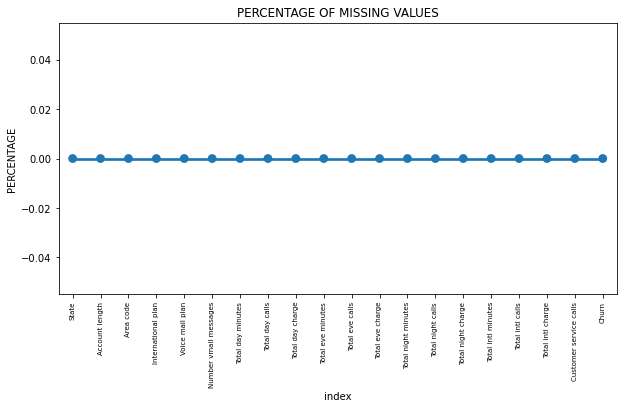

In [9]:
#check the percentage of missing values
missing_values = pd.DataFrame((telecom_data.isnull().sum())*100/len(telecom_data)).reset_index()
plt.figure(figsize=(10,5))
ax = sns.pointplot('index',0,data=missing_values)
plt.xticks(rotation =90,fontsize =7)
plt.title("PERCENTAGE OF MISSING VALUES")
plt.ylabel("PERCENTAGE")
plt.show()

In [10]:
#count the number of duplicated values
len(telecom_data[telecom_data.duplicated()])

0

There are no duplicated and missing values in the data set.So there is no need to clean the missing values.

In [11]:
telecom_data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
#COLUMNS DESCRIPTION
      

STATE:
     There are 51 unique states present.

ACCOUNT LENGTH:
               It is the length that the customer used their account

AREA CODE:
          Indicates code number of area.There are 3 unique area code present

INTERNATIONAL PLAN:
                   Yes means plan taken and no means plan not taken

VOICE MAIL PLAN:
                Yes means plan taken and no means plan not taken


NUMBER OF VMAIL MESSAGES:
                         number of voice mail messages

TOTAL DAY MINUTES:
                  Total number of minutes spent in morning

TOTAL DAY CALLS:
                The number of calls in morning

TOTAL DAY CHARGE:
                Total charge to the customers in morning


TOTAL EVE MINUTES:
                 Total number of minutes spent in evening

TOTAL EVE CALLS:
                The number of calls in evening

TOTAL EVE CHARGE:
                 Total charge to the customers in evening

TOTAL NIGHT MINUTES:
                    Total number of minutes spent in night

TOTAL NIGHT CALLS:
                  The number of calls in night

TOTAL NIGHT CHARGE:
                   Total charge to the customers in night

TOTAL INTL MINUTES:
                   Total number of minutes spent in international calls

TOTAL INTL CALLS:
                 Total number of international calls

TOTAL INTL CHARGE:
                  Total charge to the international calls

CUSTOMER SERVICE CALLS:
                       Number of customer service calls

CHURN:
      Customer churn,True indicates churned customer, False indicates retained customer







      

In [ ]:
#1.How many customers are churned?

In [12]:
(telecom_data["Churn"]==True).sum()

483

483 customers are churned from network

In [13]:
(telecom_data['Churn']==False).sum()

2850

2850 customers are not churned

In [14]:
#2.How many customers having Voice mail plan?

In [15]:
(telecom_data["Voice mail plan"]=='Yes').sum()

922

922  customers having voicemail plan.

In [16]:
(telecom_data["Voice mail plan"]=='No').sum()

2411

2411 customers do not have any voicemail plan

In [ ]:
#3.How many customers having International plan?

In [17]:
(telecom_data["International plan"]=='Yes').sum()

323

323 customers having International plan

In [18]:
(telecom_data["International plan"]=='No').sum()

3010

3010 customers do not have any international plan

In [ ]:
# 4.show the percentage of churn with a pie chart?

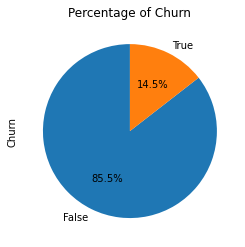

In [19]:
telecom_data["Churn"].value_counts().plot.pie(startangle=90,autopct='%1.1f%%')
plt.title('Percentage of Churn')
plt.show()

Among 3333 customers 14.5% customers are churned.

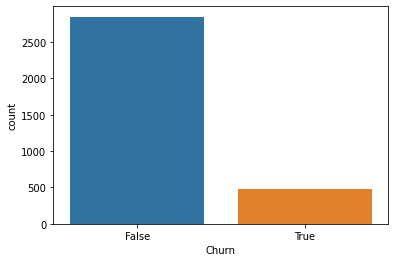

In [20]:
sns.countplot(telecom_data["Churn"])

# ***EXPLORATORY DATA ANALYSIS***

In [ ]:
#5.Analyse the each feature effect on the churning with visualizations?

Let's see the impact of other features on Churning

***ANALYSING THE RELATION BETWEEN STATE AND CHURN***

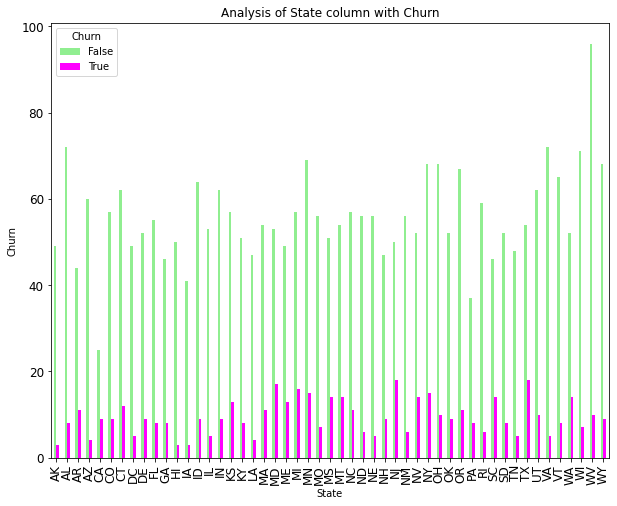

In [21]:
#Analyse the state column impact on churn 
churned_customers = telecom_data.groupby(['State','Churn'])['Churn'].count().unstack()
churned_customers.plot(kind='bar',color = ['lightgreen','magenta'],figsize=(10,8),fontsize = 12)
plt.title('Analysis of State column with Churn')
plt.xlabel('State')
plt.ylabel('Churn')
plt.show()


In [22]:
#calculate the percentage of churn in each state
Statedata = pd.crosstab(telecom_data["State"],telecom_data["Churn"])
Statedata['Percentage_Churn'] = Statedata.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Statedata)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

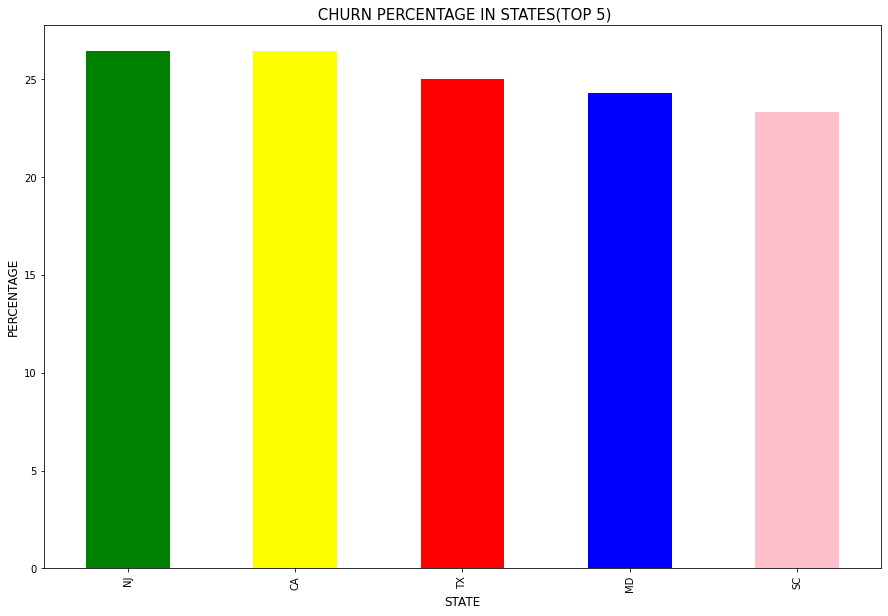

In [23]:
plt.rcParams['figure.figsize'] = (15, 10)
((telecom_data.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(5).plot.bar(color = ['green','yellow','red','blue','pink'])
plt.title(" CHURN PERCENTAGE IN STATES(TOP 5)", fontsize = 15)
plt.xlabel('STATE', fontsize = 12)
plt.ylabel('PERCENTAGE', fontsize = 12)
plt.show()

From the above analysis we conclude that NJ,CA,TX,MD,SC states have high churn rate.I think high churn rate may be due to the low coverage of the mobile network in these states.

***ANALYSING THE RELATION BETWEEN ACCOUNT LENGTH AND CHURN***

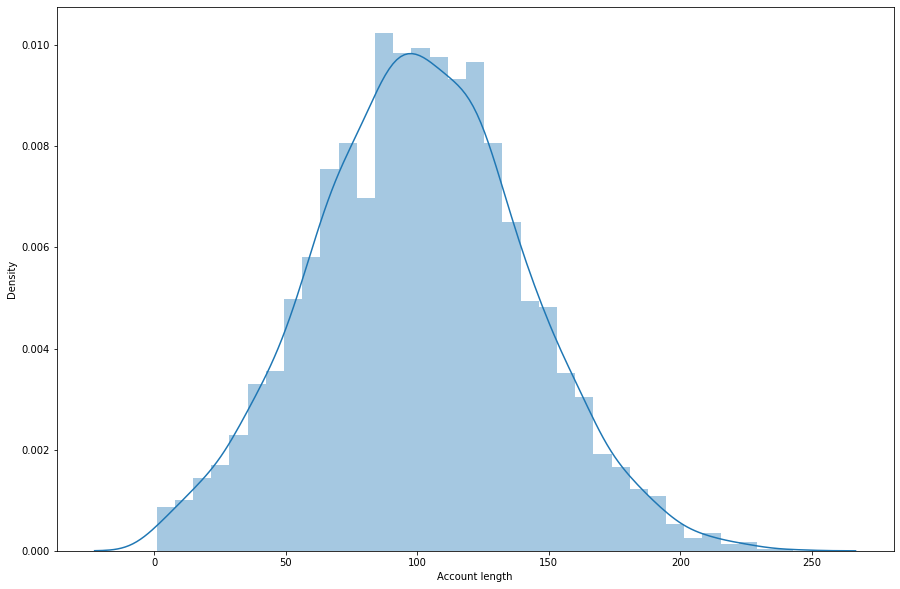

In [24]:
#Distribution plot of Account length
sns.distplot(telecom_data['Account length'])

In [25]:
#splitting the churned and non_churned customers
churned_data = telecom_data[telecom_data["Churn"]==True]
non_churned_data = telecom_data[telecom_data["Churn"]==False]

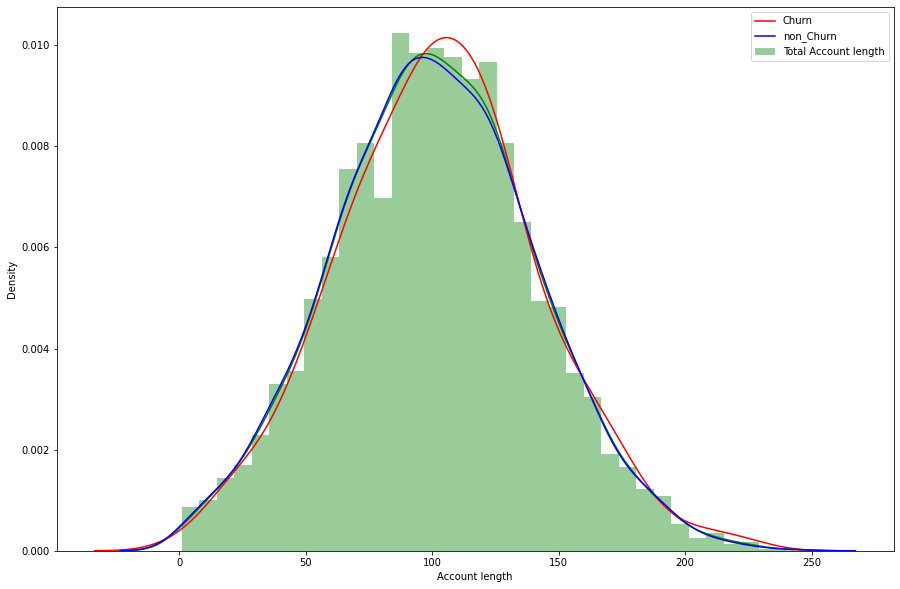

In [26]:
#Distribution plot of churned account length and non_churned Account length
sns.distplot(telecom_data['Account length'],color='green',label='Total Account length')
sns.distplot(churned_data['Account length'],hist=False,color='red',label='Churn')
sns.distplot(non_churned_data['Account length'],hist=False,color='blue',label='non_Churn')
plt.legend()

**After above analysis I observe there is no useful relation between Account length and Churn. **

***ANALYSING THE RELATION BETWEEN AREA CODE AND CHURN***

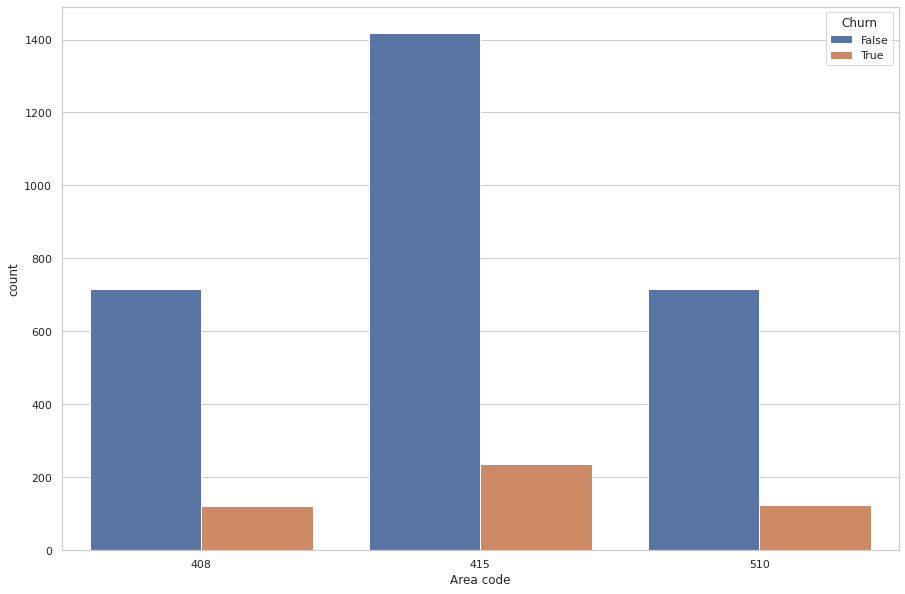

In [27]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Area code', hue="Churn", data=telecom_data)
plt.show()


In our data we have three unique area codes.They are 408,415,510.Here we notice that these area codes don't impact on the churning.

***ANALYSING THE RELATION BETWEEN INTERNATIONAL PLAN AND CHURN***

In [28]:
telecom_data['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

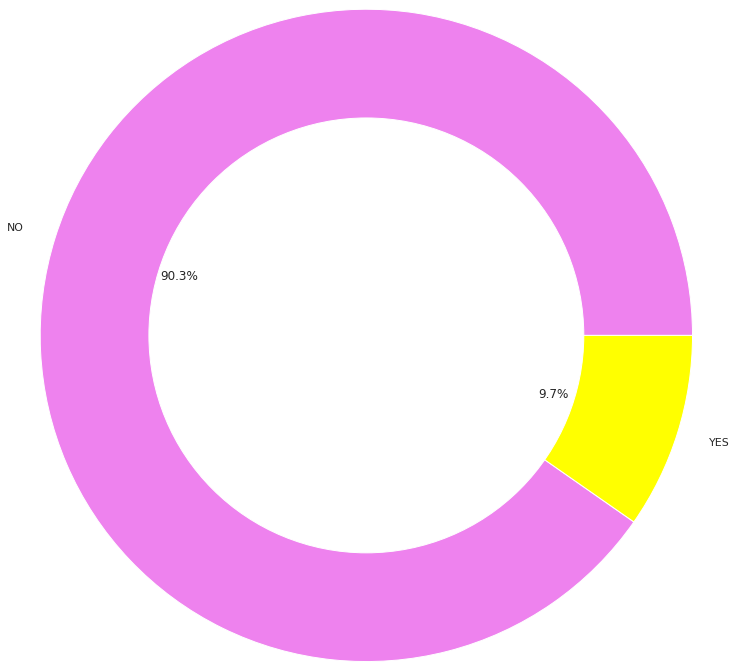

In [29]:
#calculate the percentage of customers who have International plan
data = telecom_data['International plan'].value_counts()
plt.pie(data,autopct='%1.1f%%',radius = 1.5, labels = ['NO','YES'],colors=['violet' ,'yellow'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()


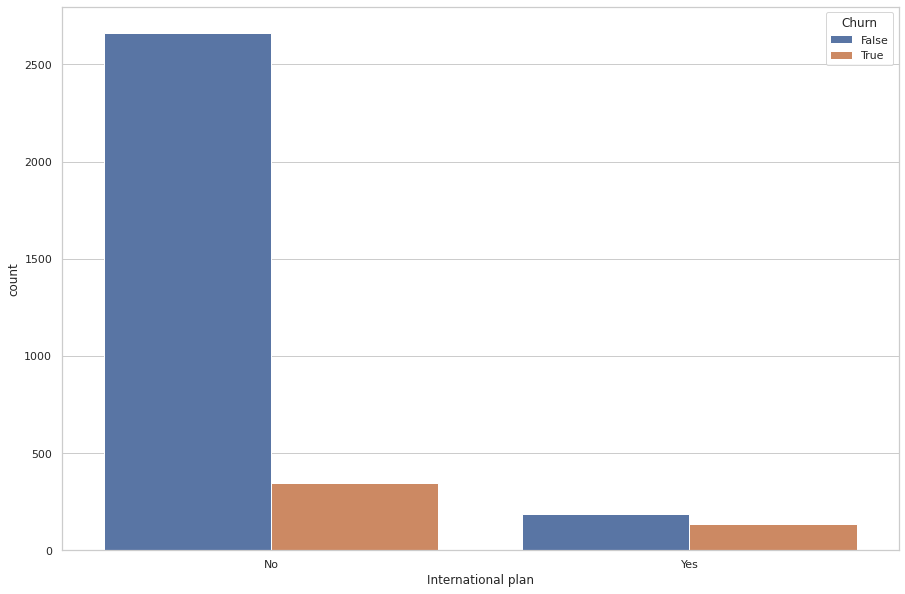

In [30]:
#Analyse the International plan v/s Churn with count plot
sns.countplot(x='International plan',hue="Churn",data=telecom_data)

In [31]:
#calculate the churn percentage of customers having International plan
International_plan_dataframe = pd.crosstab(telecom_data["International plan"],telecom_data["Churn"])
International_plan_dataframe['Percentage Churn'] = International_plan_dataframe.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_dataframe)


Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


Frome above analysis we observe there are 323 customers having International plan and 3010 customers donot have this plan.so we conclude that 9.7% of customers having International plan.The customers who taken International plan are churning mostly.

***ANALYSING THE RELATION BETWEEN VOICEMAIL PLAN AND CHURN***

In [32]:
telecom_data['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

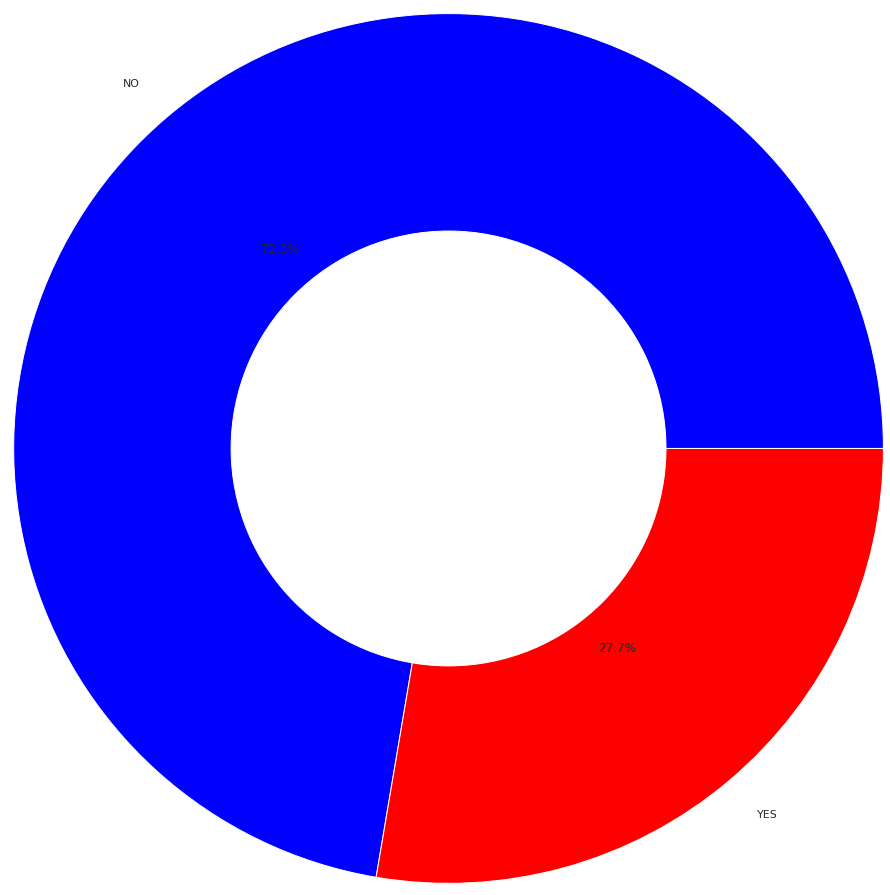

In [33]:
#calculate the percentage of customers having voicemail plan
data = telecom_data['Voice mail plan'].value_counts()
plt.pie(data,autopct='%1.1f%%',radius = 2, labels = ['NO','YES'],colors=['blue' ,'red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()


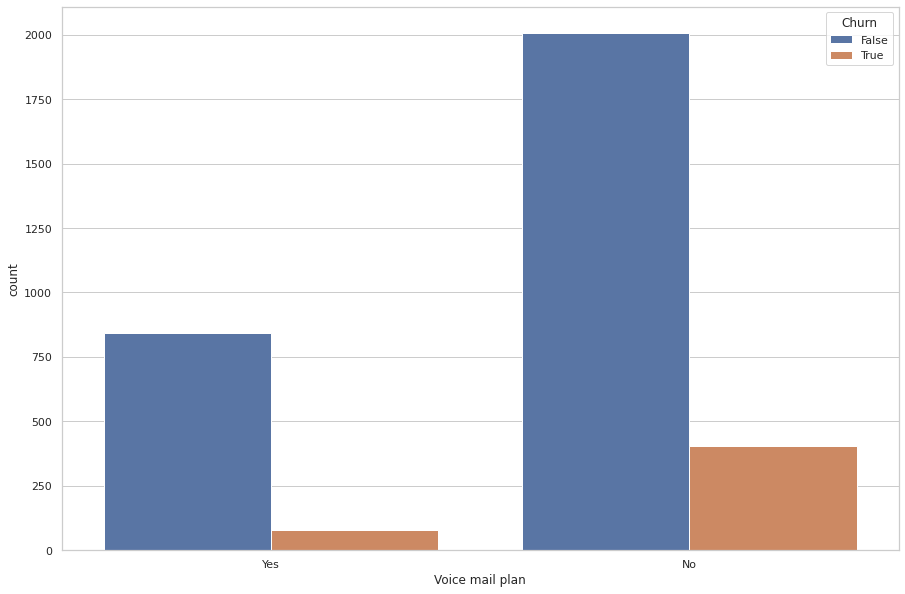

In [34]:
#Analyse the Voice mail plan v/s Churn with countplot
sns.countplot(x='Voice mail plan',hue="Churn",data=telecom_data)

In [35]:
voicemail_plan_dataframe = pd.crosstab(telecom_data["Voice mail plan"],telecom_data["Churn"])
voicemail_plan_dataframe['Percentage Churn'] = International_plan_dataframe.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(voicemail_plan_dataframe)


Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         11.495017
Yes                842    80         42.414861


By above analysis we observe there is no good relation between the voice mail plan and churn.So we continue the analysis on next feature.

**ANALYSE THE RELATION BETWEEN NUMBER VMAIL MESSAGES AND CHURN**

In [36]:
#Get the complete description of the Number vmail messages
telecom_data["Number vmail messages"].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

In [37]:
telecom_data["Number vmail messages"].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

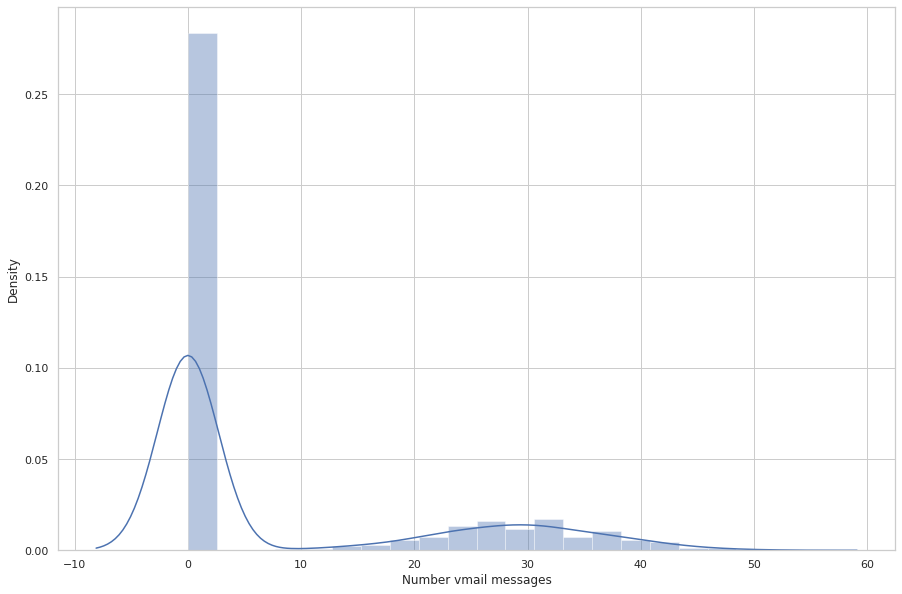

In [38]:
sns.distplot(telecom_data['Number vmail messages'])

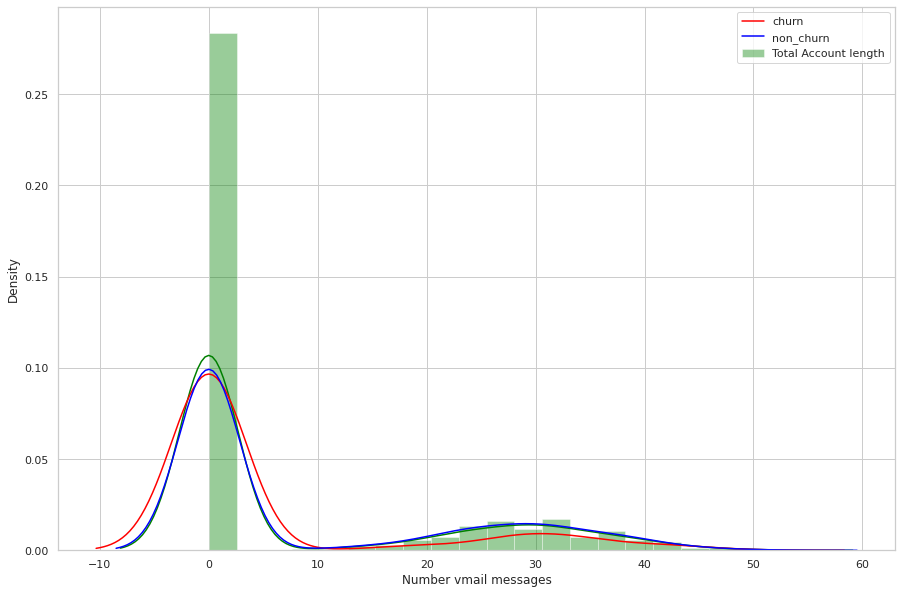

In [39]:
sns.distplot(telecom_data["Number vmail messages"],color='green',label='Total Account length')
sns.distplot(churned_data['Number vmail messages'],hist=False,color='red',label='churn')
sns.distplot(non_churned_data["Number vmail messages"],hist=False,color='blue',label='non_churn')
plt.legend()


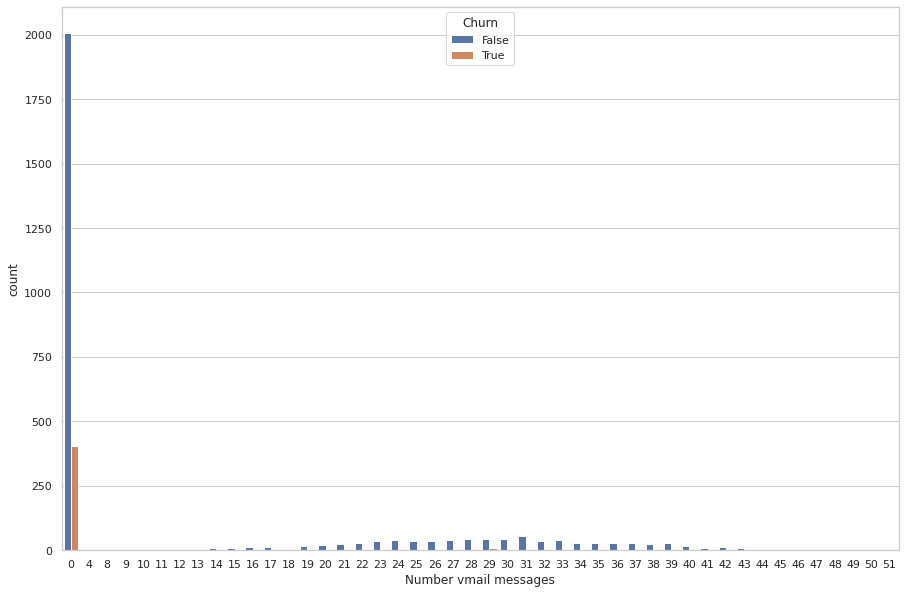

In [40]:
sns.countplot(x='Number vmail messages',hue="Churn",data=telecom_data)

After analysing the above data I notice that Number vmail messages are impact on churning slightly.The customers who don't send vmail messages are also churned.So I think there is other features effecting on churning.

***ANALYSE THE RELATION BETWEEN THE TOTAL DAY CALLS,TOTAL DAY MINUTES,TOTAL DAY CHARGE AND CHURN***

In [41]:
#what is the average time do churned customers spend on the mobile during the day time?
telecom_data.groupby(['Churn'])['Total day minutes'].mean()

Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64

In [50]:
#How many average calls done by churned customers during the day time?
telecom_data.groupby(['Churn'])['Total day calls'].mean()

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64

In [43]:
#what is the average Total day charge of churned customers?
telecom_data.groupby(["Churn"])['Total day charge'].mean()

Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64

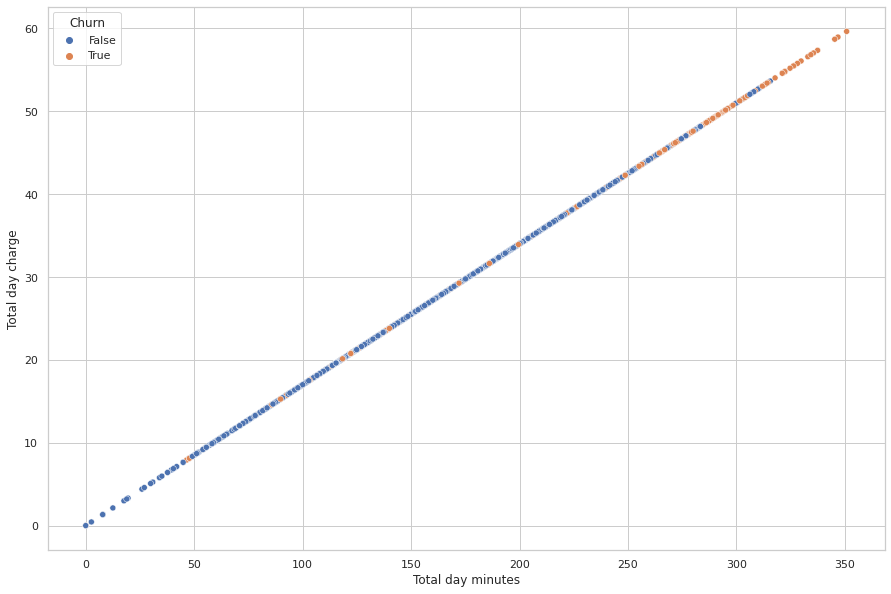

In [44]:
# Show the relation between total day charge,total day minutes and churn by using scatterplot?
sns.scatterplot(x="Total day minutes",y="Total day charge",hue="Churn",data=telecom_data)

***ANALYSE THE RELATION BETWEEN TOTAL EVE MINUTES,TOTAL EVE CALLS,TOTAL EVE CHARGE AND CHURN***

In [53]:
#what is the average time do churned customers spend on the mobile during the eve time?
telecom_data.groupby(['Churn'])['Total eve minutes'].mean()

Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64

In [54]:
#How many average calls done by churned customers during the eve time?
telecom_data.groupby(["Churn"])["Total eve calls"].mean()

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64

In [55]:
#Check the mean value of total eve charge?
telecom_data.groupby(["Churn"])["Total eve charge"].mean()

Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64

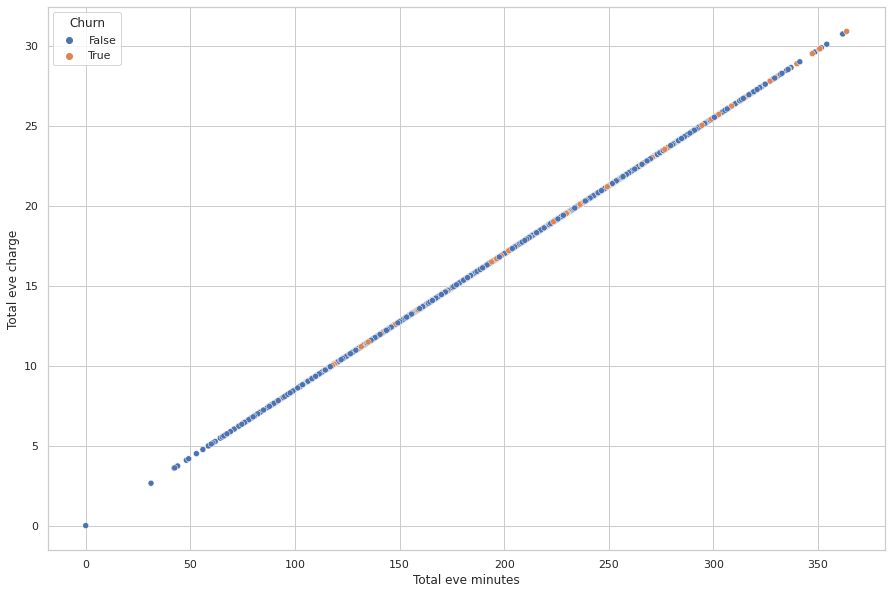

In [57]:
# Show the relation between total eve charge,total eve minutes and churn by using scatterplot?
sns.scatterplot(x="Total eve minutes",y="Total eve charge",hue="Churn",data=telecom_data)

**ANALYSE THE RELATION BETWEEN THE TOTAL NIGHT MINUTES,TOTAL NIGHT CALLS,TOTAL NIGHT CHARGE AND CHURN**

In [60]:
#what is the average time do churned customers spend on the mobile during night time?
telecom_data.groupby(["Churn"])["Total night minutes"].mean()

Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64

In [61]:
#How many average calls done by the churned customers during the night time?
telecom_data.groupby(["Churn"])["Total night calls"].mean()

Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64

In [65]:
#what is the average of the total night charge?
telecom_data.groupby(["Churn"])["Total night charge"].mean()

Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64

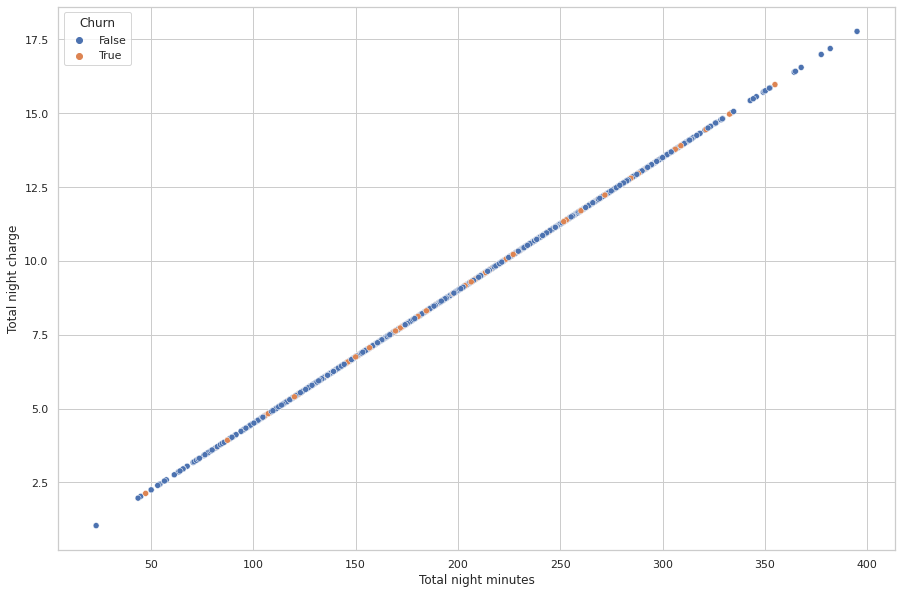

In [64]:
#show the relation between the total night minutes,total night charge and churn?
sns.scatterplot(x="Total night minutes",y="Total night charge",hue="Churn",data=telecom_data)

***ANALYSE THE RELATION BETWEEN THE TOTAL INTL MINUTES,TOTAL INTL CALLS,TOTAL INTL CHARGE AND CHURN***

In [66]:
#what is the average time taken by the churned customers during international calls?
telecom_data.groupby(["Churn"])["Total intl minutes"].mean()

Churn
False    10.158877
True     10.700000
Name: Total intl minutes, dtype: float64

In [70]:
#How many average intl calls done by the churned customers?
telecom_data.groupby(["Churn"])["Total intl calls"].mean()

Churn
False    4.532982
True     4.163561
Name: Total intl calls, dtype: float64

In [71]:
#check the average intl charges of churned customers?
telecom_data.groupby(["Churn"])['Total intl charge'].mean()

Churn
False    2.743404
True     2.889545
Name: Total intl charge, dtype: float64

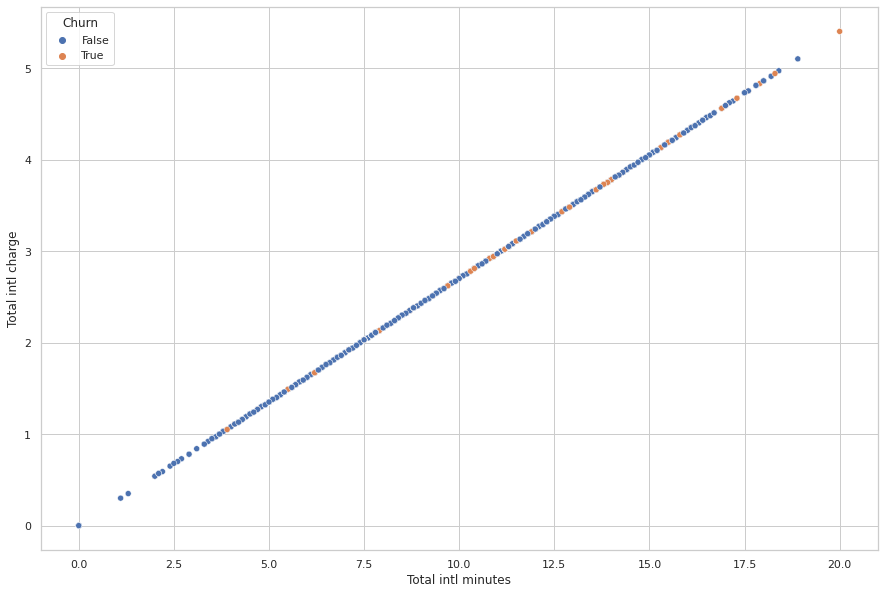

In [75]:
#show the relation between the total intl minutes,total intl charge and churn by using scatterplot?
sns.scatterplot(x="Total intl minutes",y='Total intl charge',hue="Churn",data=telecom_data)